In [2]:
#spark.stop()

In [10]:
from pyspark.sql import SparkSession

# Create a SparkSession object
spark = SparkSession.builder \
        .appName('603_Project_1') \
        .getOrCreate()

# Read CSV file into RDD
rdd = spark.sparkContext.textFile("project.csv")

# Convert RDD to DataFrame
header = rdd.first() # extract the header
df = rdd.filter(lambda row: row != header) \
        .map(lambda row: row.split(",")) \
        .toDF(header.split(","))

In [11]:
# Cast columns to appropriate data types
df = df.withColumn("year", df["year"].cast("short"))
df = df.withColumn("month", df["month"].cast("short"))
df = df.withColumn("day", df["day"].cast("short"))
df = df.withColumn("OP_CARRIER", df["OP_CARRIER"].cast("string"))
df = df.withColumn("OP_CARRIER_FL_NUM", df["OP_CARRIER_FL_NUM"].cast("short"))
df = df.withColumn("ORIGIN", df["ORIGIN"].cast("string"))
df = df.withColumn("DEST", df["DEST"].cast("string"))
df = df.withColumn("CRS_DEP_TIME", df["CRS_DEP_TIME"].cast("float"))
df = df.withColumn("DEP_TIME", df["DEP_TIME"].cast("float"))
df = df.withColumn("DEP_DELAY", df["DEP_DELAY"].cast("float"))
df = df.withColumn("CRS_ARR_TIME", df["CRS_ARR_TIME"].cast("float"))
df = df.withColumn("ARR_TIME", df["ARR_TIME"].cast("float"))
df = df.withColumn("ARR_DELAY", df["ARR_DELAY"].cast("float"))
df = df.withColumn("CANCELLED", df["CANCELLED"].cast("float"))
df = df.withColumn("DIVERTED", df["DIVERTED"].cast("float"))
df = df.withColumn("CRS_ELAPSED_TIME", df["CRS_ELAPSED_TIME"].cast("float"))
df = df.withColumn("ACTUAL_ELAPSED_TIME", df["ACTUAL_ELAPSED_TIME"].cast("float"))
df = df.withColumn("AIR_TIME", df["AIR_TIME"].cast("float"))
df = df.withColumn("DISTANCE", df["DISTANCE"].cast("float"))
df = df.withColumn("CARRIER_DELAY", df["CARRIER_DELAY"].cast("float"))
df = df.withColumn("WEATHER_DELAY", df["WEATHER_DELAY"].cast("float"))
df = df.withColumn("NAS_DELAY", df["NAS_DELAY"].cast("float"))
df = df.withColumn("SECURITY_DELAY", df["SECURITY_DELAY"].cast("float"))
df = df.withColumn("LATE_AIRCRAFT_DELAY", df["LATE_AIRCRAFT_DELAY"].cast("float"))

# Register DataFrame as a temporary view
df.createOrReplaceTempView("flight_data")

## Cause For Airline Delay

In [4]:
# Perform analysis on the DataFrame
cause_delay = spark.sql("SELECT sum(CARRIER_DELAY) AS CARRIER_DELAY, sum(NAS_DELAY) AS NAS_DELAY, sum(SECURITY_DELAY) AS SECURITY_DELAY, sum(LATE_AIRCRAFT_DELAY) AS LATE_AIRCRAFT_DELAY FROM flight_data")

# Show the results
cause_delay.show()

+-------------------+--------------------+------------------+-------------------+
|      CARRIER_DELAY|           NAS_DELAY|    SECURITY_DELAY|LATE_AIRCRAFT_DELAY|
+-------------------+--------------------+------------------+-------------------+
|2.866150607258573E7|3.1926668933127265E7|217186.67251897816| 1302672.9807130094|
+-------------------+--------------------+------------------+-------------------+



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
# Convert the result DataFrame to Pandas for visualization
cause_delay_pd = cause_delay.toPandas()

# Calculate the total delay time
total_delay = cause_delay_pd.sum(axis=1).values[0]

# Calculate the delay causes as percentages
cause_delay_perc = (cause_delay_pd.values[0] / total_delay) * 100

# Delay cause labels
delay_causes = ['CARRIER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

# Plotting the stacked bar chart
plt.figure(figsize=(8, 6))
plt.bar(delay_causes, cause_delay_perc, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.xlabel('Delay Causes')
plt.ylabel('Percentage of Total Delay Time')
plt.title('Delay Causes as Percentages of Total Delay Time')

plt.show()

Project #1 ‐ Requirements
• In your program, you have to list at least 20 US airports (more is better)
• Do not use or generate random data for flights, use only historical data
• You may use Apache Spark GraphX or similar Spark library

Project #1 ‐ Visualization
1. Your project should display and present the following results:
2. Draw charts with historical data obtained
3. Find the airport with the largest number of departure flight
4.  Find the airport with the largest number of arriving flight
5. Find the busiest airport
6.  List out the top 10 airports with most departure delays in the future
7. List out the top 10 airports with most arrivals’ delays in the future
8. Note: Illustrate your work and display your results (to get full grade)
9. Clearly list out all assumptions made throughout the project

## Average Delay by Airline

In [6]:
avg_delay_by_airline = spark.sql("SELECT OP_CARRIER, AVG(DEP_DELAY) AS AVG_DEP_DELAY, AVG(ARR_DELAY) AS AVG_ARR_DELAY FROM flight_data GROUP BY OP_CARRIER LIMIT 23")
avg_delay_by_airline.show()

+----------+--------------------+-------------------+
|OP_CARRIER|       AVG_DEP_DELAY|      AVG_ARR_DELAY|
+----------+--------------------+-------------------+
|        UA|  10.814191087692846| 3.3659591501560677|
|        AA|   9.456790924082162|  5.178788525676053|
|        NW|  5.6744054574849105|  3.924204662578379|
|        EV|  11.923083933111561|   8.45527505442695|
|        B6|  12.368241298449748|  8.175117401950008|
|        DL|   7.437674091074725| 1.2071827570345837|
|        OO|   7.805092557858855|  5.686690750738016|
|        F9|  11.467015476235717|   9.15688494649376|
|        YV|  7.0600081637211165|  5.249744402363628|
|        US|    4.08030732476468| 1.9492512781308233|
|        MQ|   8.656504469007801| 6.8868500936072685|
|        OH|  11.094905243054864|  8.692601923170827|
|        HA|-0.03454193772436713| 0.6959604158169824|
|        XE|   8.472369157948204|  7.513713553169439|
|        AS|  1.6362907039075993|-0.9424344124500564|
|        FL|   6.14108478709

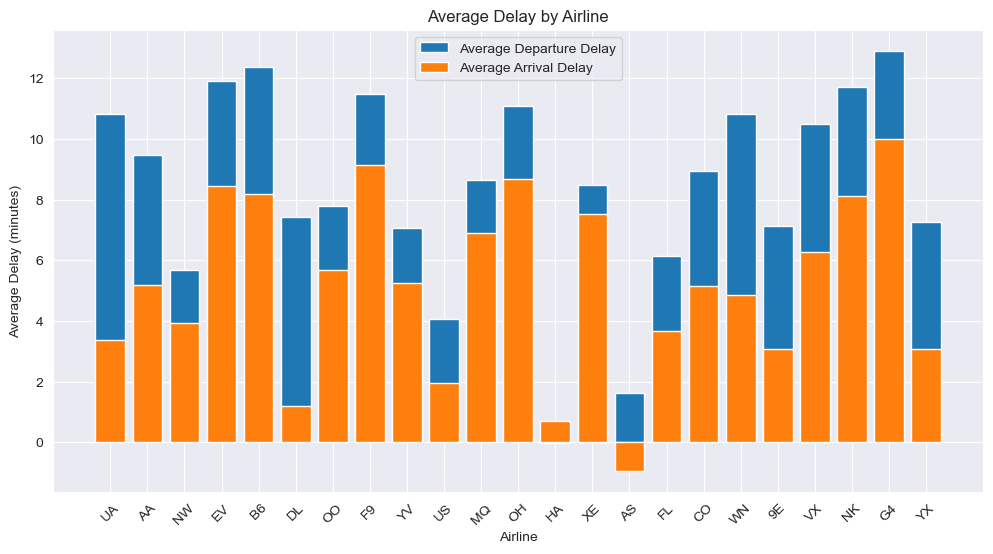

In [7]:
import matplotlib.pyplot as plt

# Convert the result DataFrame to Pandas for visualization
avg_delay_by_airline_pd = avg_delay_by_airline.toPandas()

# Plotting the average departure delay and arrival delay by airline
plt.figure(figsize=(12, 6))
plt.bar(avg_delay_by_airline_pd['OP_CARRIER'], avg_delay_by_airline_pd['AVG_DEP_DELAY'], label='Average Departure Delay')
plt.bar(avg_delay_by_airline_pd['OP_CARRIER'], avg_delay_by_airline_pd['AVG_ARR_DELAY'], label='Average Arrival Delay')
plt.xlabel('Airline')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delay by Airline')
plt.legend()
plt.xticks(rotation=45)
plt.show()

> #### This query calculates the average departure and arrival delay for each airline in the dataset.

## Total Number of Flights Per Airline

In [8]:
flights_by_airline = spark.sql("SELECT OP_CARRIER, COUNT(*) AS NUM_FLIGHTS FROM flight_data GROUP BY OP_CARRIER LIMIT 23")
flights_by_airline.show()

+----------+-----------+
|OP_CARRIER|NUM_FLIGHTS|
+----------+-----------+
|        UA|    4756591|
|        AA|    6553519|
|        NW|     290097|
|        EV|    4575858|
|        B6|    2433733|
|        DL|    7763537|
|        OO|    6131300|
|        F9|     894662|
|        YV|    1038742|
|        US|    2616125|
|        MQ|    3094311|
|        OH|     552941|
|        HA|     742923|
|        XE|    1074922|
|        AS|    1645358|
|        FL|    1203886|
|        CO|     732372|
|        WN|   11938390|
|        9E|    1030589|
|        VX|     384560|
+----------+-----------+
only showing top 20 rows



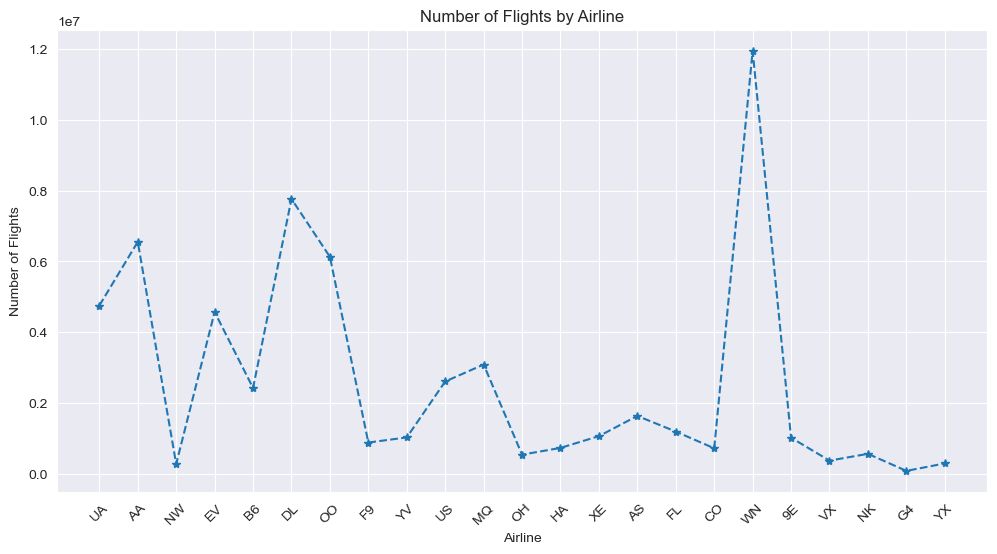

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
# Convert the result DataFrame to Pandas for visualization
flights_by_airline_pd = flights_by_airline.toPandas()

# Plotting the number of flights by airline as a line graph
plt.figure(figsize=(12, 6))
plt.plot(flights_by_airline_pd['OP_CARRIER'], flights_by_airline_pd['NUM_FLIGHTS'], marker='*', linestyle='--')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.title('Number of Flights by Airline')
plt.xticks(rotation=45)

plt.show()

> #### This query calculates the total number of flights for each airline in the dataset.

## Busiest Airports by Number of Flights

In [14]:
busiest_airports = spark.sql("SELECT ORIGIN, COUNT(*) AS NUM_FLIGHTS FROM flight_data GROUP BY ORIGIN ORDER BY NUM_FLIGHTS DESC LIMIT 20")
busiest_airports.show()

+------+-----------+
|ORIGIN|NUM_FLIGHTS|
+------+-----------+
|   ATL|    3849391|
|   ORD|    2915085|
|   DFW|    2488904|
|   DEN|    2271450|
|   LAX|    2106537|
|   PHX|    1705697|
|   IAH|    1645926|
|   SFO|    1580093|
|   LAS|    1458937|
|   CLT|    1312686|
|   DTW|    1270314|
|   MSP|    1242835|
|   MCO|    1211759|
|   BOS|    1142332|
|   EWR|    1142181|
|   SLC|    1136832|
|   SEA|    1134063|
|   LGA|    1036250|
|   JFK|    1031656|
|   BWI|     985333|
+------+-----------+



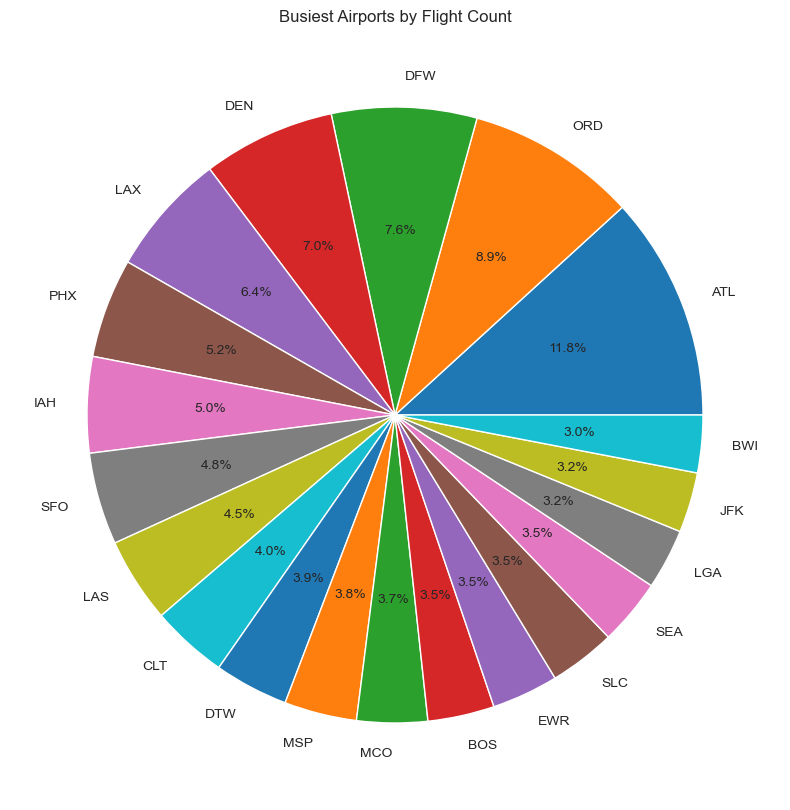

In [15]:
import matplotlib.pyplot as plt

# Convert the result DataFrame to Pandas for visualization
busiest_airports_pd = busiest_airports.toPandas()

# Plotting a pie chart with count and airline name
plt.figure(figsize=(14, 10))
plt.pie(busiest_airports_pd['NUM_FLIGHTS'], labels=busiest_airports_pd['ORIGIN'], autopct='%1.1f%%')
plt.title('Busiest Airports by Flight Count')
plt.show()

> #### This query identifies the top 10 busiest airports by the number of flights departing from them.

## Average Delay by Origin

In [16]:
avg_delay_by_origin = spark.sql("SELECT ORIGIN, AVG(DEP_DELAY) AS AVG_DEP_DELAY, AVG(ARR_DELAY) AS AVG_ARR_DELAY FROM flight_data GROUP BY ORIGIN")
avg_delay_by_origin.show()

+------+--------------------+--------------------+
|ORIGIN|       AVG_DEP_DELAY|       AVG_ARR_DELAY|
+------+--------------------+--------------------+
|   BGM|  6.0793090638930165|   2.177005943536404|
|   PSE|   2.847534799011318|-0.21243658124105633|
|   MSY|   8.208671236191403|   4.001540477667866|
|   GEG|   3.941386326517578| 0.22522103303862262|
|   BUR|   6.429669567514903|   2.802095546344766|
|   SNA|   6.356201793195255|  1.8128915273481854|
|   GRB|  5.8464444579854975|  3.7731196555156092|
|   GTF|  1.2491861023643058| -1.4706729999466297|
|   IDA|  0.9946133991695657| -1.0727565181610743|
|   GRR|   7.640176020213497|   4.172196267625338|
|   EUG|   8.381409057915228|   6.157666673998636|
|   PSG|  0.2973860877017569| 0.24425082131124126|
|   GSO|   9.742233653970379|   6.449878439801275|
|   PVD|    7.30408692398161|  1.2474807548380198|
|   MYR|  7.7665046865786955|  4.8472236341825425|
|   OAK|    8.39163600581843|   4.247713271155985|
|   MSN|    7.08573230301089|  

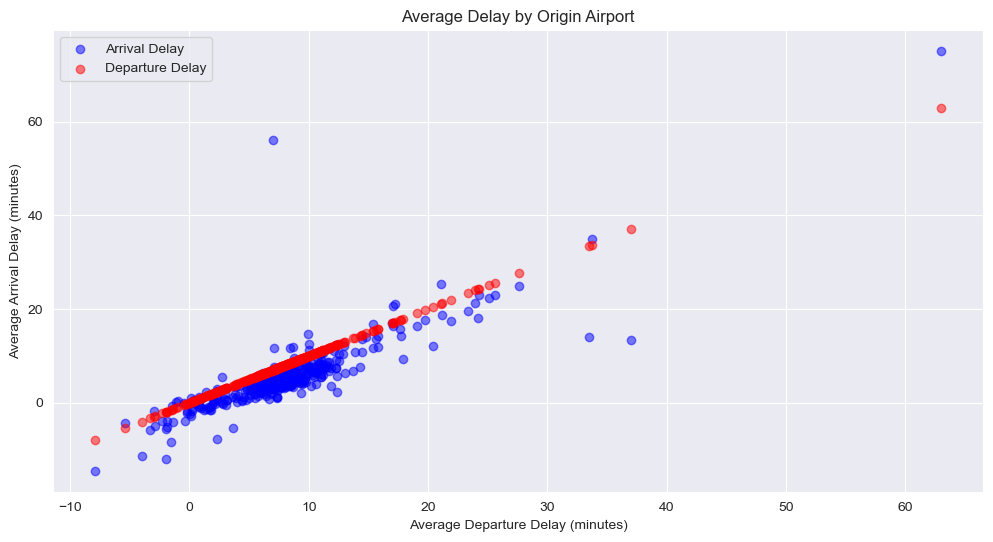

In [17]:
import matplotlib.pyplot as plt

# Convert the result DataFrame to Pandas for visualization
avg_delay_by_origin_pd = avg_delay_by_origin.toPandas()

# Plotting the average delay by origin as a scatter plot with different colors for dep_delay and arr_delay
plt.figure(figsize=(12, 6))
plt.scatter(avg_delay_by_origin_pd['AVG_DEP_DELAY'], avg_delay_by_origin_pd['AVG_ARR_DELAY'], c='blue', alpha=0.5, label='Arrival Delay')
plt.scatter(avg_delay_by_origin_pd['AVG_DEP_DELAY'], avg_delay_by_origin_pd['AVG_DEP_DELAY'], c='red', alpha=0.5, label='Departure Delay')
plt.xlabel('Average Departure Delay (minutes)')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Average Delay by Origin Airport')
plt.legend()

plt.show()

## Average Delay by Destination

In [18]:
avg_delay_by_destination = spark.sql("SELECT DEST, AVG(DEP_DELAY) AS AVG_DEP_DELAY, AVG(ARR_DELAY) AS AVG_ARR_DELAY FROM flight_data GROUP BY DEST")
avg_delay_by_destination.show()

+----+-------------------+-------------------+
|DEST|      AVG_DEP_DELAY|      AVG_ARR_DELAY|
+----+-------------------+-------------------+
| BGM|  7.903231797919762|  4.904717682020802|
| PSE| 13.464058234758872| 10.596906278434941|
| MSY|  9.209284408586715| 4.1366796826399455|
| GEG|  7.387459455519516|  3.115410547031597|
| BUR|  7.695184500096812|  4.155654061803515|
| SNA|  6.080877807289974| 1.4648341954858557|
| GRB|  9.163596153065779|  6.349653045489592|
| GTF|  3.836021934728212|0.44865037533940266|
| IDA| 3.4635412775494956|  1.264213672020919|
| GRR|  9.431063790201865|  6.046834169154397|
| EUG|  8.090021715764768|  5.327820307530326|
| PSG| 2.6578309819010975| 2.6387345019238992|
| GSO| 11.015373275771296|  7.800346308190891|
| PVD| 10.651958595223654|  5.571068645813199|
| MYR|  7.754950244218803| 4.4279807867696235|
| OAK|   9.28774752078223| 3.8574040766745012|
| MSN|   9.21696039643528|  5.699746233465212|
| COD|  4.039829302987198| 1.5028996607943976|
| BTM|-0.4732

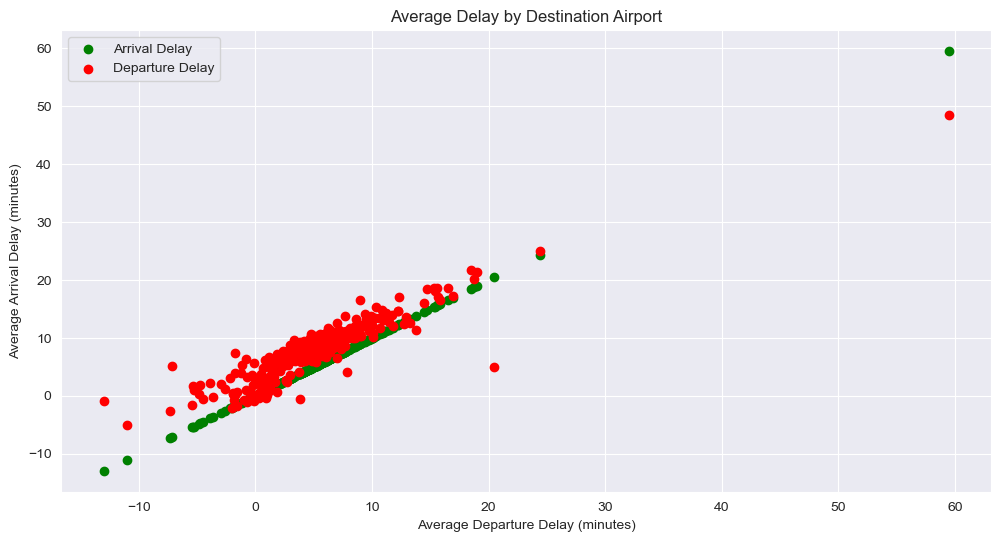

In [19]:
import matplotlib.pyplot as plt

# Convert the result DataFrame to Pandas for visualization
avg_delay_by_destination_pd = avg_delay_by_destination.toPandas()

# Create a scatter plot with different colors for arrival and departure delays
plt.figure(figsize=(12, 6))
plt.scatter(avg_delay_by_destination_pd['AVG_ARR_DELAY'], avg_delay_by_destination_pd['AVG_ARR_DELAY'], c='green', label='Arrival Delay')
plt.scatter(avg_delay_by_destination_pd['AVG_ARR_DELAY'], avg_delay_by_destination_pd['AVG_DEP_DELAY'], c='red', label='Departure Delay')
plt.xlabel('Average Departure Delay (minutes)')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Average Delay by Destination Airport')
plt.legend()

plt.show()

> #### These queries calculate the average departure and arrival delay for each origin and destination airport in the dataset.

## Average Delay by Flight Distance

In [6]:
avg_delay_by_distance = df.groupBy("DISTANCE").agg({"DEP_DELAY": "avg", "ARR_DELAY": "avg"}).orderBy("DISTANCE")
avg_delay_by_distance.show()

+--------+-------------------+--------------------+
|DISTANCE|     avg(DEP_DELAY)|      avg(ARR_DELAY)|
+--------+-------------------+--------------------+
|    11.0|               65.0|                35.0|
|    21.0|               -5.0|                -5.0|
|    24.0|             1170.0|              1182.0|
|    28.0|                7.0|                56.0|
|    30.0|                4.0|                17.0|
|    31.0|0.07101014430632947|-0.12387483926275182|
|    40.0|               68.0|                87.0|
|    41.0| 1.2175989085948158|  1.3287858117326057|
|    42.0|             117.25|               126.0|
|    43.0| 1.1067961165048543|  -9.594660194174757|
|    45.0|              100.0|                99.5|
|    47.0|               23.0|                41.0|
|    49.0| -1.046260601387818| -3.5404780262143407|
|    50.0|  5.168032786885246| -2.8155737704918034|
|    54.0|              35.25|                35.5|
|    55.0| 12.024390243902438|   3.731707317073171|
|    56.0|  

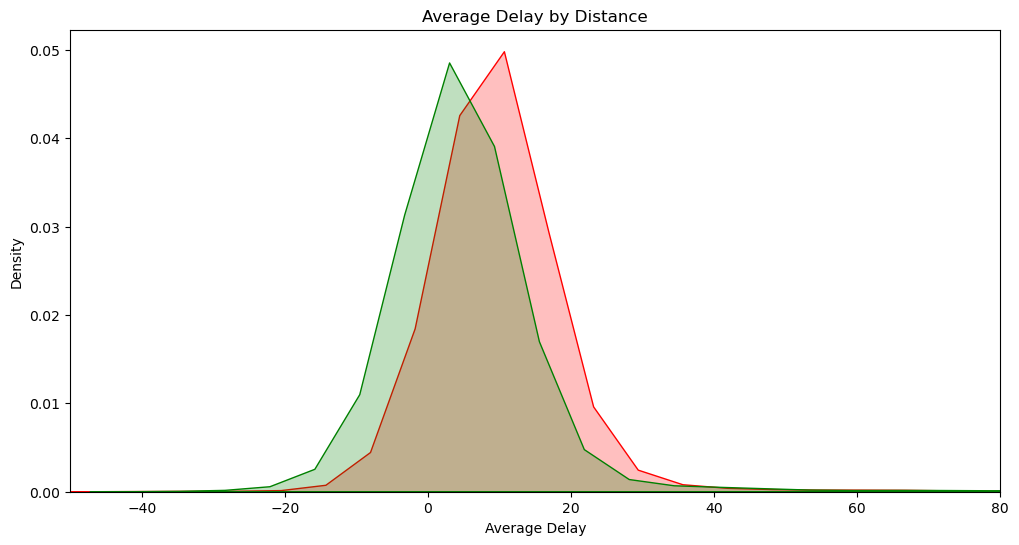

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
# Convert the Spark DataFrame to a Pandas DataFrame
pandas_df = avg_delay_by_distance.toPandas()
plt.xlim(-50,80)
sns.kdeplot(pandas_df['avg(DEP_DELAY)'],color='red',fill=True)
sns.kdeplot(pandas_df['avg(ARR_DELAY)'],color='green',fill=True)
# Set the plot title and labels
plt.title("Average Delay by Distance")
plt.xlabel("Average Delay");

## Find the Airport with the Largest Number of Departure Flight

In [22]:
largest_dep_airport = spark.sql("SELECT ORIGIN, COUNT(*) AS DEPARTURES FROM flight_data GROUP BY ORIGIN ORDER BY DEPARTURES DESC LIMIT 1")

# Show the results
largest_dep_airport.show()

+------+----------+
|ORIGIN|DEPARTURES|
+------+----------+
|   ATL|   3849391|
+------+----------+



## Find the Airport with the Largest Number of Arriving Flight

In [23]:
largest_arr_airport = spark.sql("SELECT DEST, COUNT(*) AS ARRIVALS FROM flight_data GROUP BY DEST ORDER BY ARRIVALS DESC LIMIT 1")

# Show the results
largest_arr_airport.show()

+----+--------+
|DEST|ARRIVALS|
+----+--------+
| ATL| 3844795|
+----+--------+



## Find the Busiest Airport

In [24]:
busiest_airport = spark.sql("SELECT ORIGIN, count(*) AS DEPARTURES_ARRIVALS FROM flight_data GROUP BY ORIGIN UNION ALL SELECT DEST, count(*) AS DEPARTURES_ARRIVALS FROM flight_data GROUP BY DEST ORDER BY DEPARTURES_ARRIVALS DESC LIMIT 1")
busiest_airport.show()

+------+-------------------+
|ORIGIN|DEPARTURES_ARRIVALS|
+------+-------------------+
|   ATL|            3849391|
+------+-------------------+



## List out the Top 10 Airports with Most Departure Delays In the Future

In [18]:
top_dep_delay_airports = spark.sql("SELECT ORIGIN, COUNT(*) AS DELAYED_DEPARTURES FROM flight_data WHERE DEP_DELAY > 0 AND CANCELLED = 0 GROUP BY ORIGIN ORDER BY DELAYED_DEPARTURES DESC LIMIT 10")

# Show the results
top_dep_delay_airports.show()

+------+------------------+
|ORIGIN|DELAYED_DEPARTURES|
+------+------------------+
|   ATL|           1436510|
|   ORD|           1194114|
|   DFW|           1035865|
|   DEN|            994252|
|   LAX|            847053|
|   IAH|            666106|
|   PHX|            659217|
|   LAS|            641694|
|   SFO|            638386|
|   EWR|            493378|
+------+------------------+



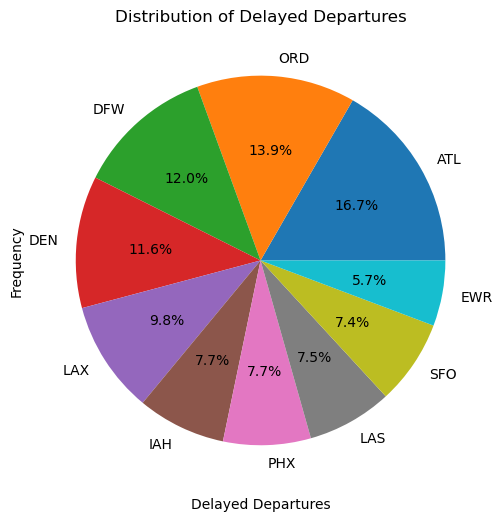

In [22]:
# Convert the result DataFrame to Pandas for visualization
plt.figure(figsize=(12, 6))
top_dep_delay_airports_pd = top_dep_delay_airports.toPandas()
plt.xlabel('Delayed Departures')
plt.ylabel('Frequency')
plt.title('Distribution of Delayed Departures')
plt.pie(top_dep_delay_airports_pd['DELAYED_DEPARTURES'], labels=top_dep_delay_airports_pd['ORIGIN'], autopct='%1.1f%%');

## List out the Top 10 Airports with Most Arrivals Delays in the Future

In [31]:
top_arr_delay_airports = spark.sql("SELECT DEST, COUNT(*) AS DELAYED_ARRIVALS FROM flight_data WHERE ARR_DELAY > 0 AND CANCELLED = 0 GROUP BY DEST ORDER BY DELAYED_ARRIVALS DESC LIMIT 10")

# Show the results
top_arr_delay_airports.show()

+----+----------------+
|DEST|DELAYED_ARRIVALS|
+----+----------------+
| ATL|         1328147|
| ORD|         1069912|
| DFW|          877537|
| LAX|          842359|
| DEN|          812551|
| SFO|          668444|
| PHX|          613204|
| IAH|          595289|
| LAS|          537856|
| EWR|          491576|
+----+----------------+



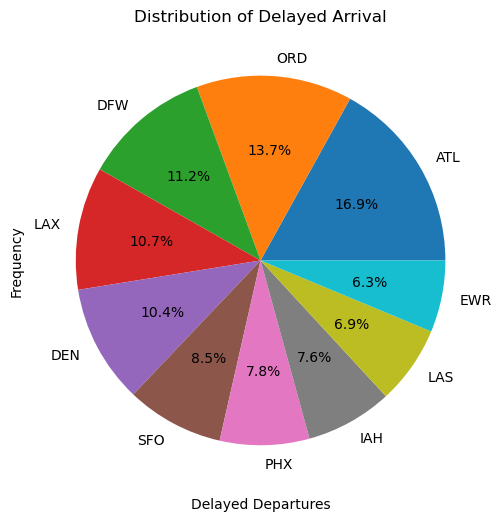

In [33]:
# Convert the result DataFrame to Pandas for visualization
pandas_df = top_arr_delay_airports.toPandas()
plt.figure(figsize=(12, 6))
plt.xlabel('Delayed Departures')
plt.ylabel('Frequency')
plt.title('Distribution of Delayed Arrival')
plt.pie(pandas_df['DELAYED_ARRIVALS'], labels=pandas_df['DEST'], autopct='%1.1f%%');

## Machine Learning Model To Predict Upcoming Delay.

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
cat_cols = ["OP_CARRIER", "ORIGIN", "DEST"]
num_cols = ["month", "day", "year", "CRS_DEP_TIME", "DISTANCE", "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "AIR_TIME"]

# Convert categorical columns to numerical using StringIndexer and OneHotEncoder
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index") for col in cat_cols]
encoder = OneHotEncoder(inputCols=[indexer.getOutputCol() for indexer in indexers], outputCols=[col + "_encoded" for col in cat_cols])

# Assemble all features into a single vector
assembler = VectorAssembler(inputCols=num_cols + [col + "_encoded" for col in cat_cols], outputCol="features")

# Create the linear regression model
lr = LinearRegression(featuresCol="features", labelCol="DEP_DELAY",regParam=0.01)

# Create the pipeline
pipeline = Pipeline(stages=indexers + [encoder, assembler, lr])

# Split the data into training and testing sets
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# Train the model
model = pipeline.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Evaluate the model's performance
evaluator = RegressionEvaluator(labelCol="DEP_DELAY", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
r2 = evaluator.setMetricName("r2").evaluate(predictions)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

# Save the trained model
model.save("delay_prediction_model")

## Confusion Matrix and Scores